In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


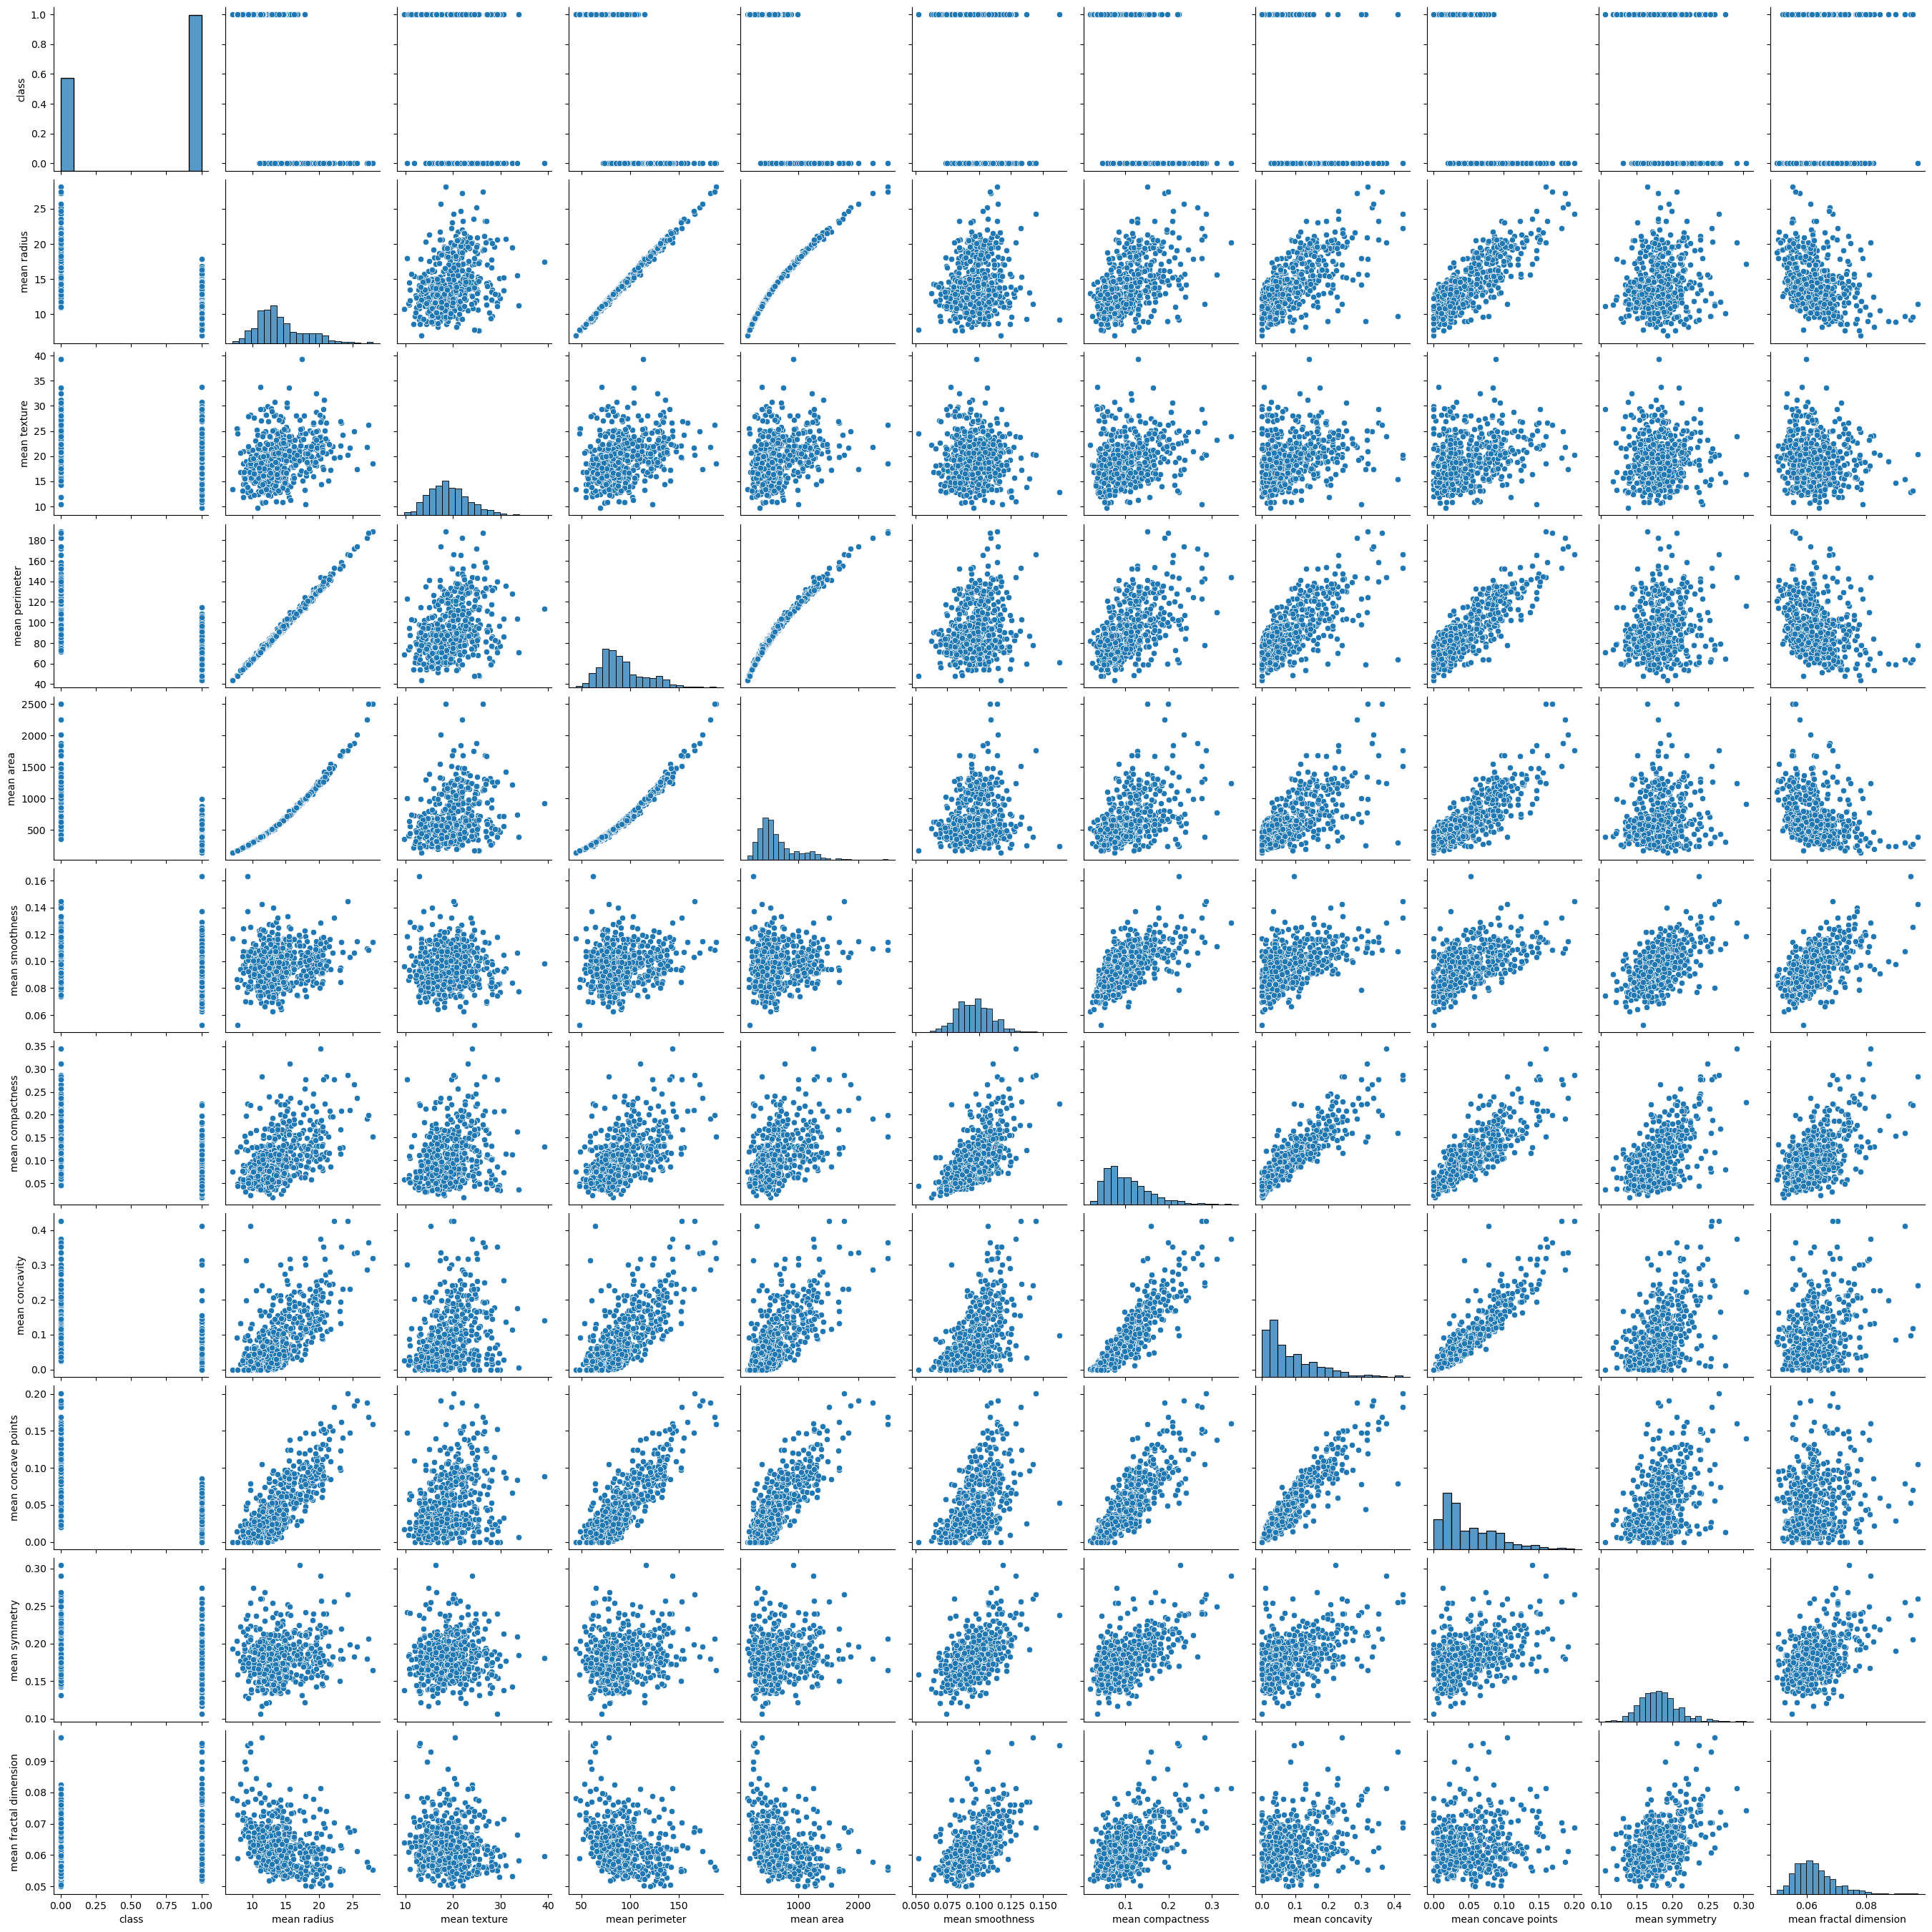

In [3]:
df['class'] = cancer.target
sns.pairplot(df[['class'] + list(df.columns[:10])])
plt.show()

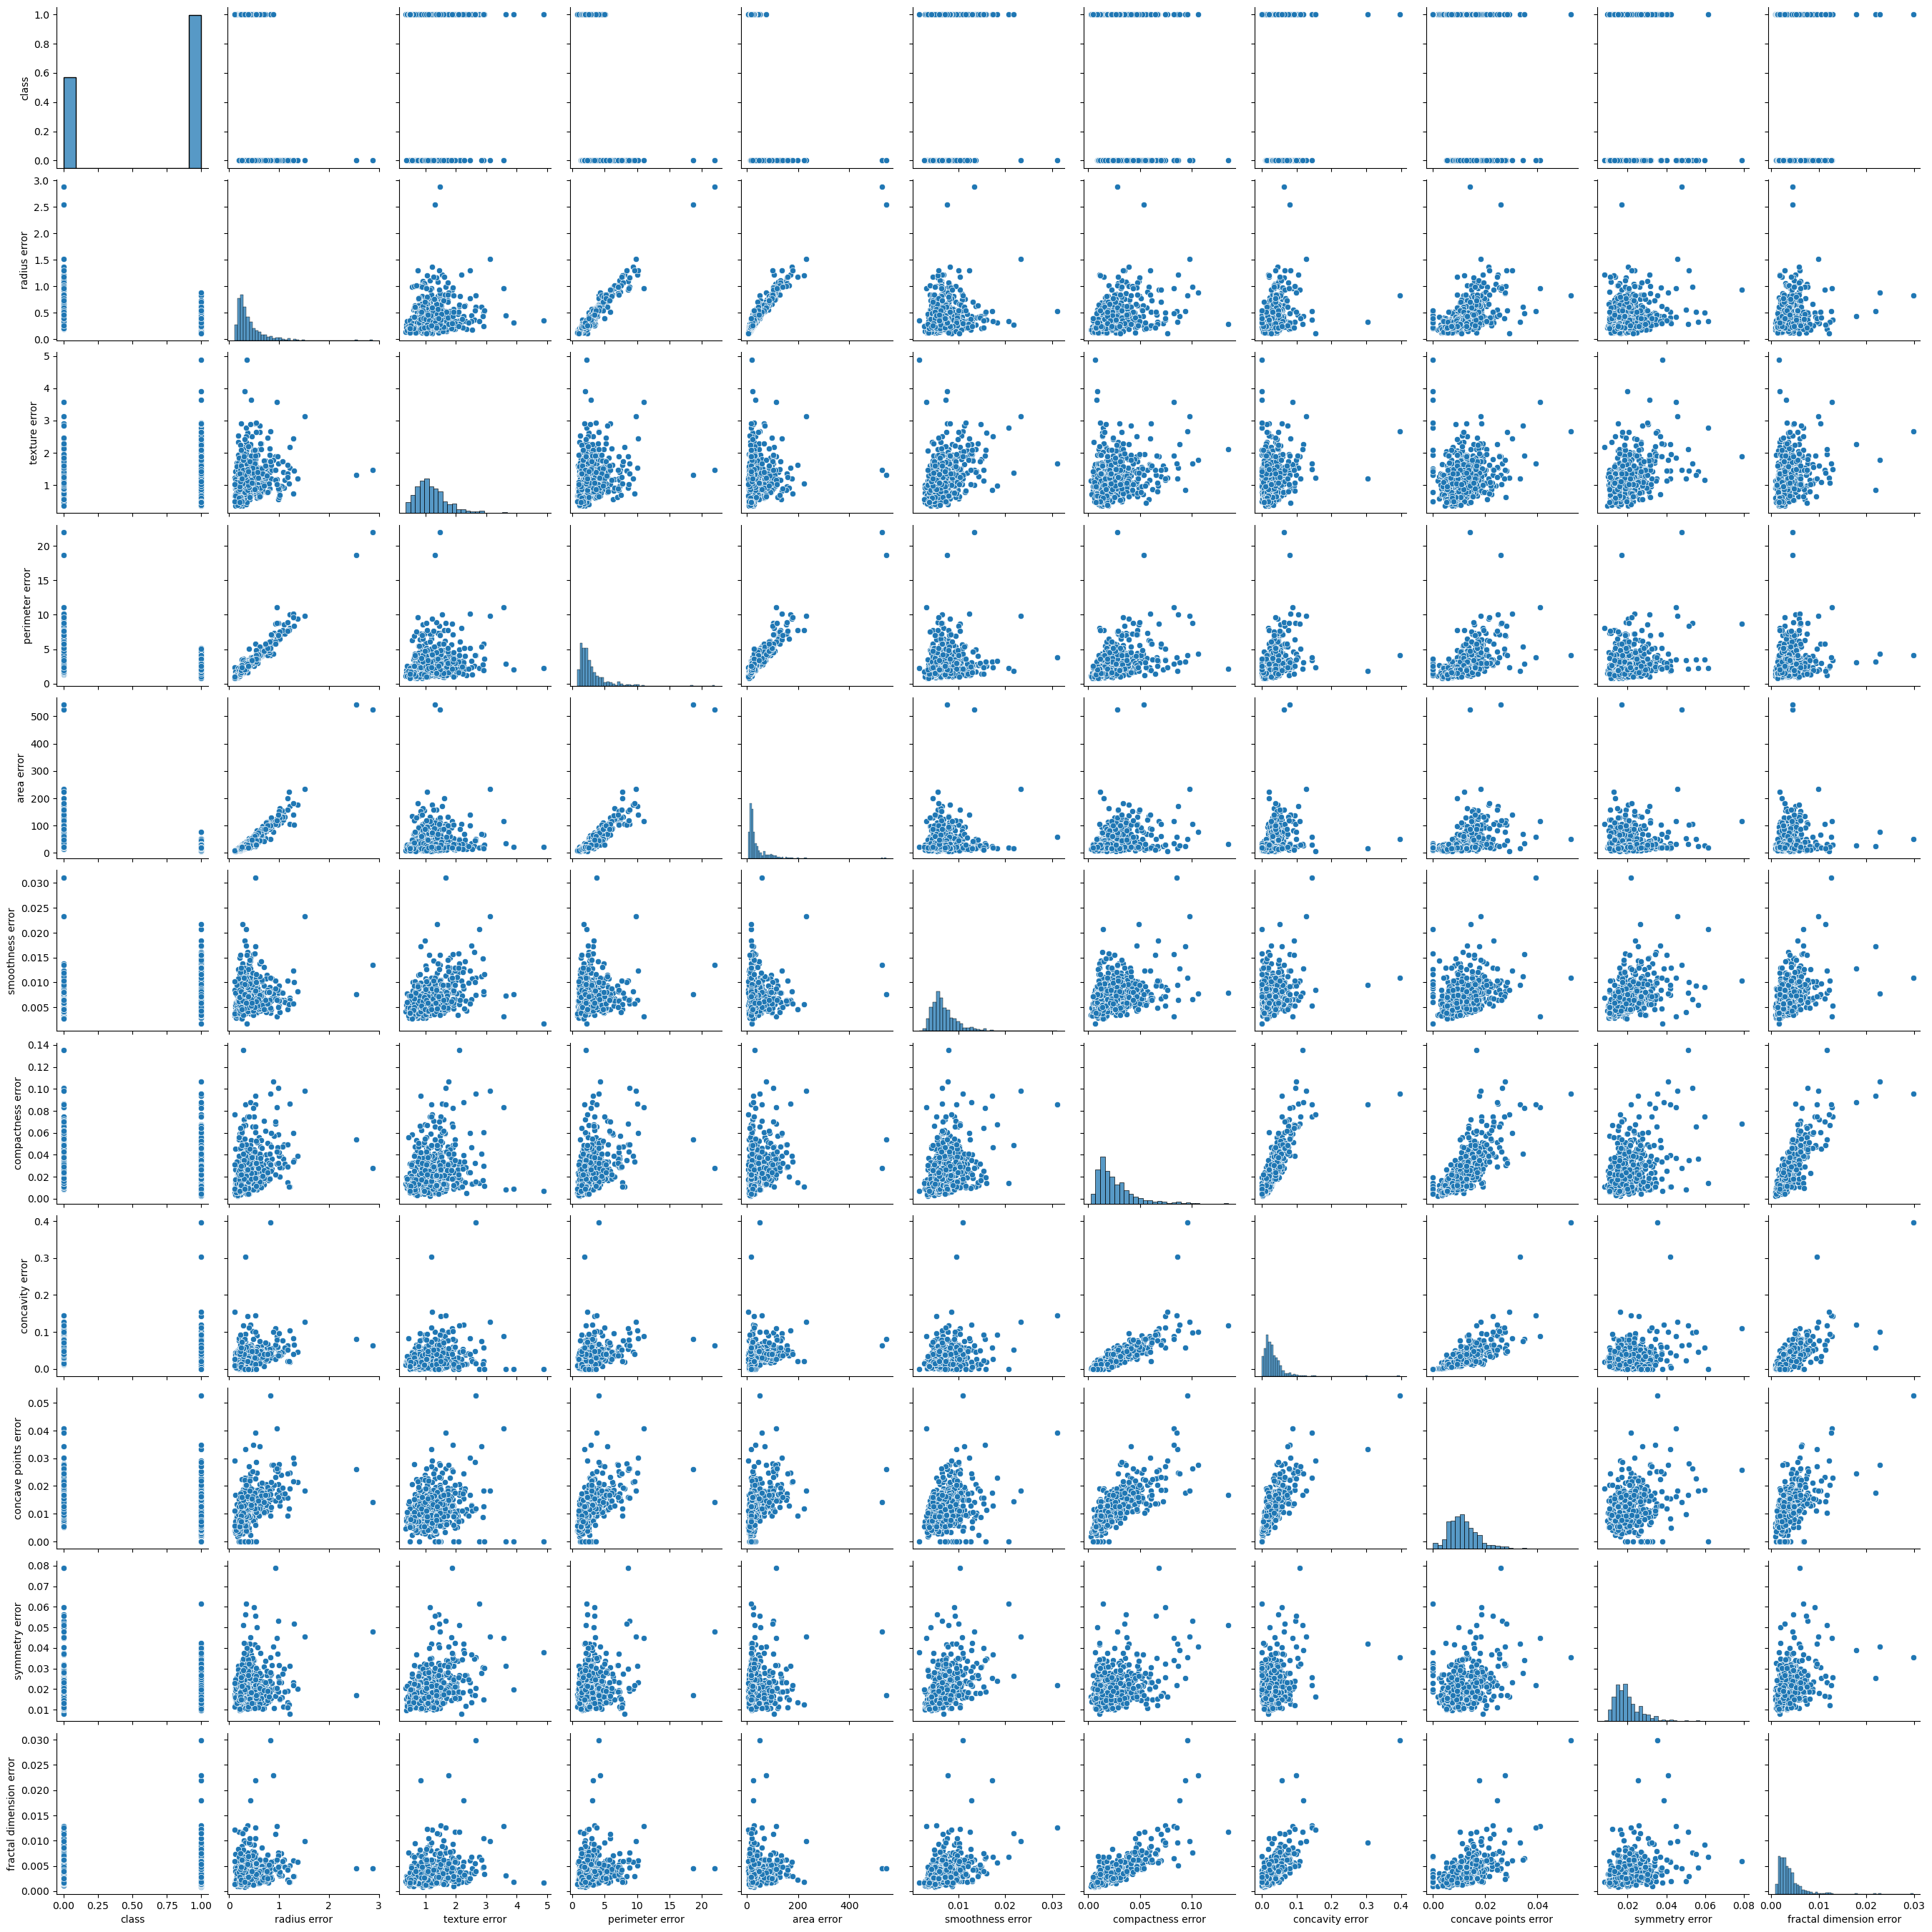

In [4]:
sns.pairplot(df[['class']+list(df.columns[10:20])])
plt.show()

In [5]:
cols=["mean radius", "mean texture", "mean smoothness", "mean compactness", "mean concave points", 
       "worst radius", "worst texture", "worst smoothness", "worst compactness", "worst concave points", "class"]

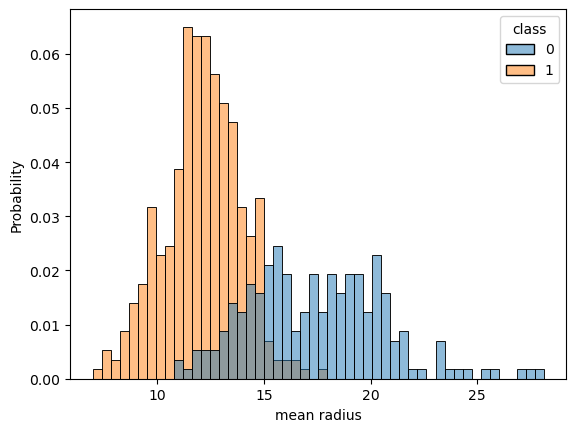

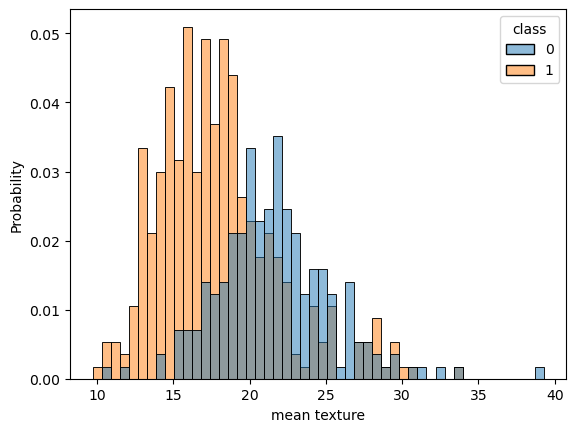

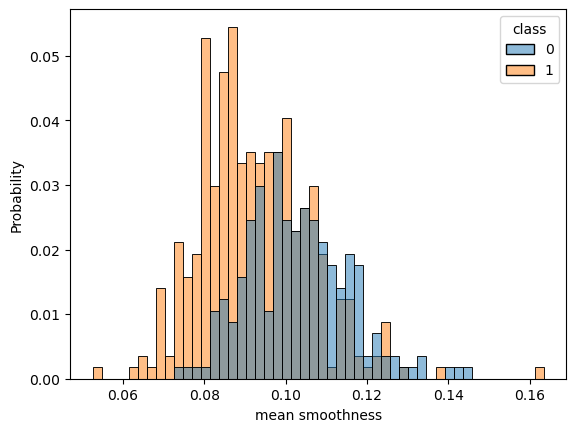

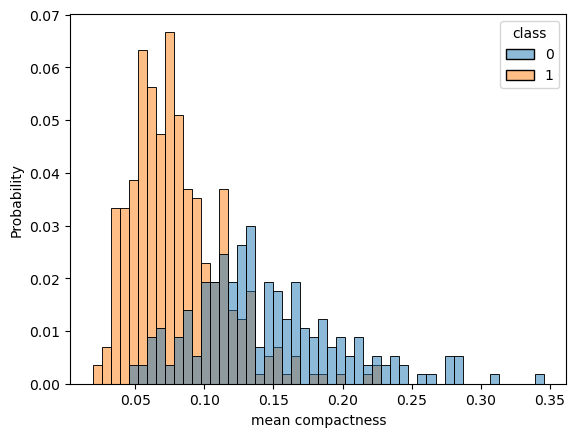

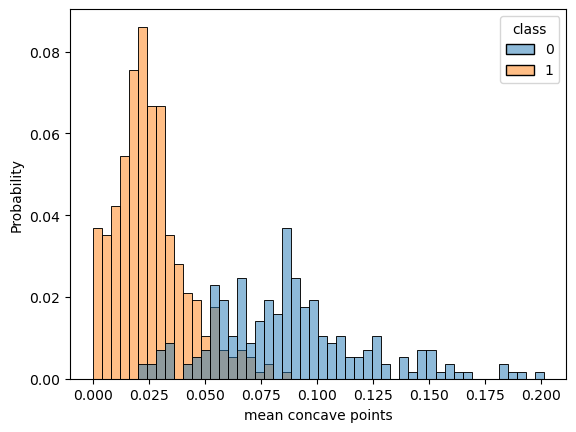

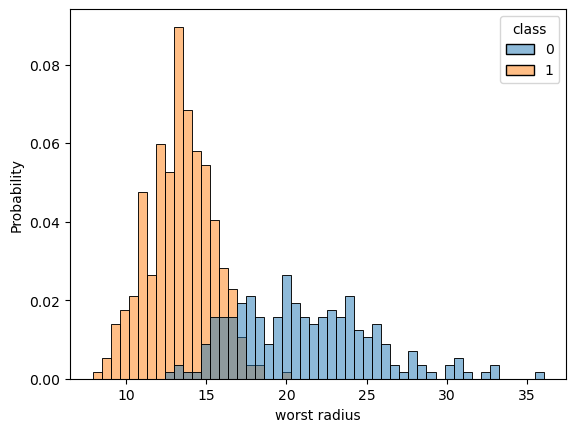

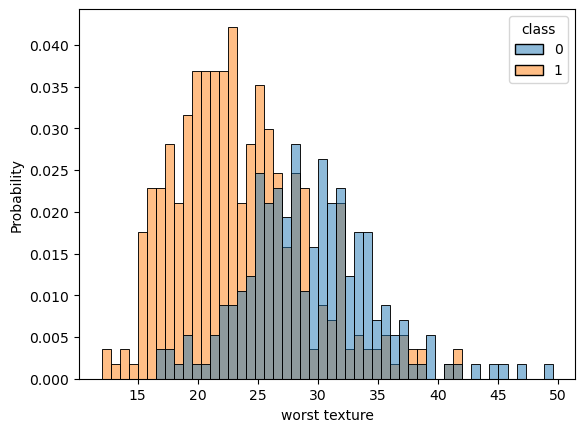

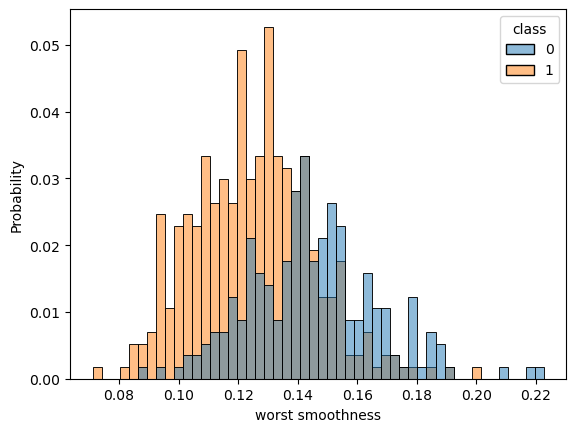

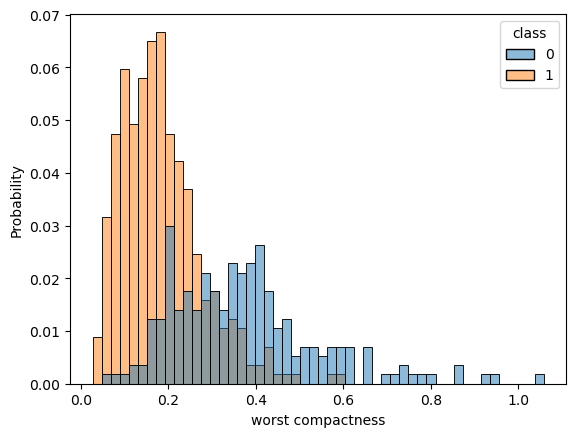

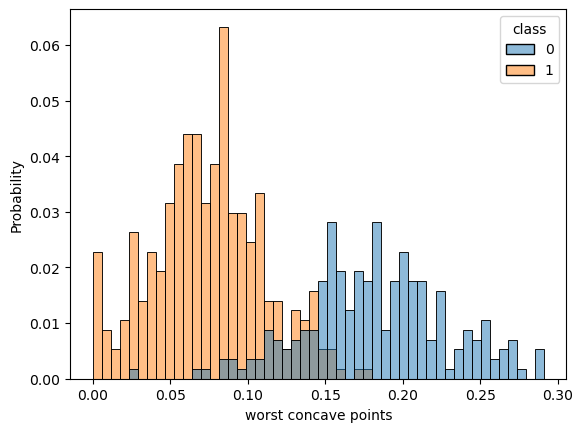

In [6]:
for c in cols[:-1]:
    sns.histplot(df, x=c, hue=cols[-1], bins=50, stat='probability')
    plt.show()

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

data = torch.from_numpy(df[cols].values).float()
data.shape

x=data[:,:-1]
y=data[:,-1:]

print(x.shape, y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


In [8]:
torch.Size([569, 11])
torch.Size([569, 1])

n_epochs=200000
learning_rate = 1e-2
print_interval=10000

In [9]:
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim) :
        self.input_dim = input_dim
        self.output_dim = output_dim

        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.act = nn.Sigmoid()
    
    def forward(self, x):
        y = self.act(self.linear(x))
        return y

In [10]:
model = MyModel(input_dim=x.size(-1), output_dim=y.size(-1))
crit = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = crit(y_hat, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % print_interval == 0:
        print('epoch: ', i, 'loss: ', loss.item())

epoch:  9999 loss:  0.28105905652046204
epoch:  19999 loss:  0.23077036440372467
epoch:  29999 loss:  0.2008785605430603
epoch:  39999 loss:  0.18146920204162598
epoch:  49999 loss:  0.16796287894248962
epoch:  59999 loss:  0.1580481380224228
epoch:  69999 loss:  0.1504632532596588
epoch:  79999 loss:  0.14446893334388733
epoch:  89999 loss:  0.13961030542850494
epoch:  99999 loss:  0.13558736443519592
epoch:  109999 loss:  0.1321973353624344
epoch:  119999 loss:  0.1293010413646698
epoch:  129999 loss:  0.12679634988307953
epoch:  139999 loss:  0.12460464984178543
epoch:  149999 loss:  0.12266883999109268
epoch:  159999 loss:  0.12094848603010178
epoch:  169999 loss:  0.11940573900938034
epoch:  179999 loss:  0.11801452934741974
epoch:  189999 loss:  0.11675116419792175
epoch:  199999 loss:  0.11559530347585678


In [12]:
correct_cnt = (y==(y_hat>.5)).sum()
total_cnt = float(y.size(0))

print('Accuracy:  %.4f' % (correct_cnt / total_cnt))

Accuracy:  0.9631


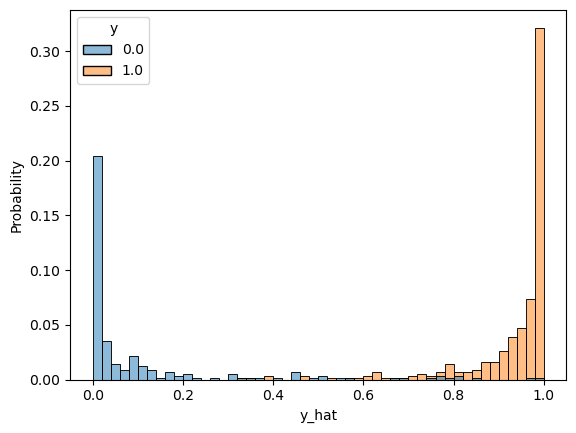

In [13]:
df= pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(), columns=["y", "y_hat"])

sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()
